In [7]:
from dpm.models import LinearRegression, L1Regression, RidgeRegression, LassoRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch

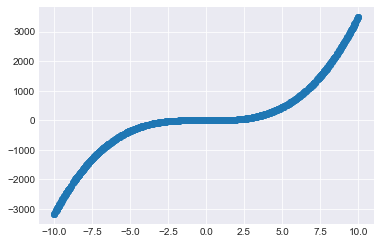

In [40]:
N = 1000

x = np.random.uniform(-10, 10, (N, 1))
x = np.concatenate((x**3, x**2, x), axis = 1)
# print(x[:, 1])
w = np.array([[3.4], [1.6], [-4.5]])
b = -4.2
y = x @ w  + b + np.random.normal(0, 1, (N, 1))
plt.scatter(x[:, 2], y); plt.show()


In [41]:
model = LassoRegression(input_dim=3, tau=10.)

In [42]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.1383, -0.2478, -0.4720], grad_fn=<ViewBackward>),
 tensor([0.1905], grad_fn=<ViewBackward>)]

In [43]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([-0.1383, -0.2478, -0.4720,  0.1905], grad_fn=<CatBackward>)

In [44]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

In [45]:
[p.view(-1) for p in model.model.parameters()]

[tensor([3.3356, 1.5748, 0.1238], grad_fn=<ViewBackward>),
 tensor([-2.8576], grad_fn=<ViewBackward>)]

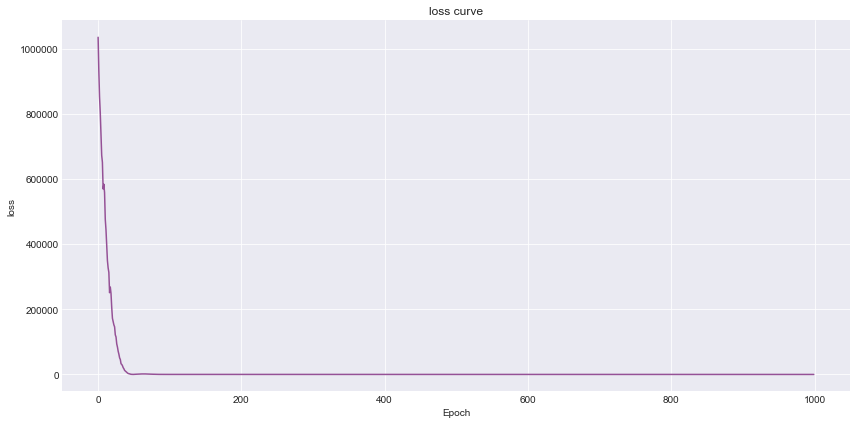

In [46]:
plot_stats(stats)

In [47]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[ 3.3356],
        [ 1.5748],
        [ 0.1238],
        [-2.8576]], grad_fn=<ViewBackward>)

In [48]:
y[5]

array([-0.07866683])

In [49]:
# model.predict(torch.tensor(x).float()).detach().numpy()
model(x)[0][5]

tensor([-3.4856], grad_fn=<SelectBackward>)

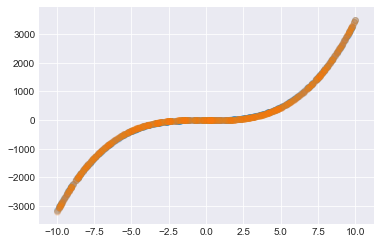

In [50]:
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

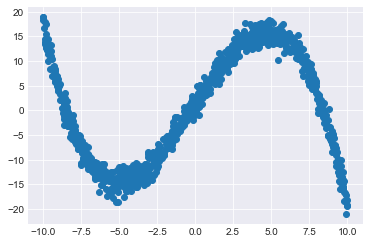

In [51]:
y_pred = model.predict(x).detach()
residual = y_pred - torch.tensor(y).float()
plt.scatter(x[:, 2], residual)

In [52]:
print(residual.mean())
print(residual.var())

tensor(0.5302)
tensor(116.4787)


In [53]:
y = torch.sigmoid(torch.tensor(y))

In [54]:
y = y.round().float()

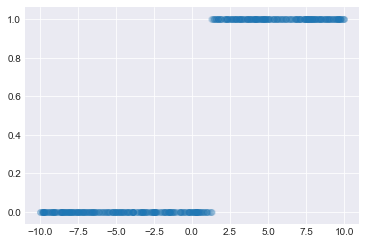

In [55]:
# plt.scatter(x[:, 2], model.sample(torch.Tensor(x)).detach(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

In [56]:
model = LogisticRegression(input_dim=3)
print(x.shape)
print(y.shape)

(1000, 3)
torch.Size([1000, 1])


In [57]:
model.model.log_prob(torch.tensor(y).float(), torch.tensor(x).float())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[-23.0259],
        [-23.0259],
        [ -0.8442],
        [-23.0259],
        [ -0.7687],
        [ -0.5902],
        [-23.0259],
        [-23.0259],
        [ -0.5872],
        [-23.0259],
        [-22.7743],
        [ -0.6975],
        [ -0.5908],
        [-13.3564],
        [-23.0259],
        [ -1.5830],
        [ -0.9315],
        [ -0.5953],
        [ -0.0858],
        [-23.0259],
        [ -5.5115],
        [-23.0259],
        [ -4.2250],
        [ -0.8435],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [ -0.4970],
        [-23.0258],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-12.4459],
        [-23.0259],
        [-11.2419],
        [-23.0259],
        [ -0.5942],
        [ -4.6475],
        [-23.0259],
        [-23.0259],
        [ -0.5884],
        [-23.0259],
        [-23.0259],
        [ -2.3044],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [-23.0259],
        [ -4.2737],
        [-23.0259],


In [58]:
model.model(torch.Tensor(x))

[tensor([[4.1560e-39],
         [1.0000e+00],
         [5.7012e-01],
         [4.1560e-39],
         [5.3638e-01],
         [4.4577e-01],
         [1.0000e+00],
         [4.1560e-39],
         [4.4413e-01],
         [1.0000e+00],
         [2.8598e-11],
         [5.0219e-01],
         [4.4613e-01],
         [1.5826e-06],
         [1.0000e+00],
         [7.9463e-01],
         [6.0603e-01],
         [4.4859e-01],
         [8.2223e-02],
         [1.0000e+00],
         [9.9596e-01],
         [4.1560e-39],
         [9.8537e-01],
         [5.6979e-01],
         [1.0000e+00],
         [1.0000e+00],
         [4.1560e-39],
         [3.9167e-01],
         [5.6350e-16],
         [1.0000e+00],
         [1.4934e-36],
         [4.1560e-39],
         [1.0000e+00],
         [1.0000e+00],
         [9.9999e-01],
         [3.7836e-38],
         [4.4799e-01],
         [9.9041e-01],
         [4.1560e-39],
         [4.1560e-39],
         [4.4479e-01],
         [1.0000e+00],
         [1.0000e+00],
         [9

In [59]:
stats = model.fit(x, y)

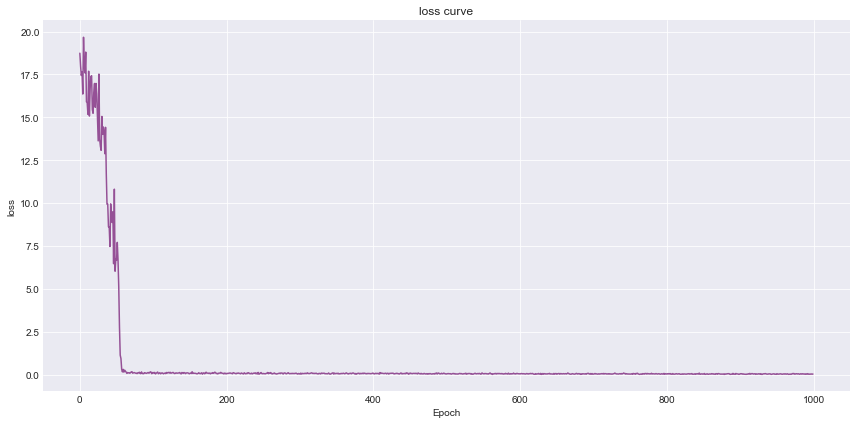

In [60]:
plot_stats(stats)

In [61]:
x

array([[ 320.40735867,   46.82397952,    6.84280495],
       [-123.79782068,   24.83945139,   -4.98391928],
       [  -2.85490143,    2.01246072,   -1.41861225],
       ...,
       [-832.8786516 ,   88.52266641,   -9.40864849],
       [ -33.4813099 ,   10.38807222,   -3.22305325],
       [ -47.52119404,   13.11972996,   -3.62211678]])

In [62]:
x.shape
[p.view(-1) for p in model.model.parameters()]

[tensor([ 0.3215, -0.3163,  1.3305], grad_fn=<ViewBackward>),
 tensor([-2.0608], grad_fn=<ViewBackward>)]

In [63]:
torch.Tensor(x)

tensor([[ 320.4073,   46.8240,    6.8428],
        [-123.7978,   24.8395,   -4.9839],
        [  -2.8549,    2.0125,   -1.4186],
        ...,
        [-832.8787,   88.5227,   -9.4086],
        [ -33.4813,   10.3881,   -3.2231],
        [ -47.5212,   13.1197,   -3.6221]])

In [64]:
model.model(torch.Tensor(x))

[tensor([[1.0000e+00],
         [3.3590e-25],
         [4.0587e-03],
         [1.0000e+00],
         [5.8572e-03],
         [3.2867e-02],
         [4.1560e-39],
         [1.0000e+00],
         [1.5580e-01],
         [4.1560e-39],
         [9.9996e-01],
         [8.9898e-03],
         [3.1840e-02],
         [9.9336e-01],
         [4.1560e-39],
         [4.7258e-04],
         [2.8380e-03],
         [5.7929e-02],
         [4.7816e-01],
         [1.0538e-38],
         [1.5021e-06],
         [1.0000e+00],
         [7.5856e-06],
         [4.0726e-03],
         [3.7890e-36],
         [4.1560e-39],
         [1.0000e+00],
         [2.0517e-01],
         [1.0000e+00],
         [5.3928e-26],
         [1.0000e+00],
         [1.0000e+00],
         [6.9527e-10],
         [9.4916e-29],
         [2.4387e-09],
         [1.0000e+00],
         [2.8291e-02],
         [4.3994e-06],
         [1.0000e+00],
         [1.0000e+00],
         [4.1168e-02],
         [1.2079e-24],
         [4.1560e-39],
         [1

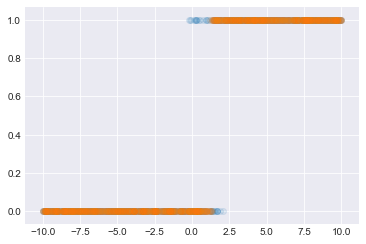

In [65]:
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

In [66]:
(y == model.predict(x)).float().mean()

tensor(0.9670)

In [67]:
from torch import distributions as dists
from dpm.distributions import Bernoulli

In [68]:
p = [0.5, 0.7]
model = Bernoulli(p)
t_model = dists.Bernoulli(torch.tensor(p))

In [69]:
s = model.sample(4)

In [70]:
model.entropy(), t_model.entropy()

(tensor([0.6931, 0.6109]), tensor([0.6931, 0.6109]))

In [71]:
model.variance, t_model.variance

(tensor([0.2500, 0.2100]), tensor([0.2500, 0.2100]))

In [72]:
model.expectation, t_model.mean

(tensor([0.5000, 0.7000]), tensor([0.5000, 0.7000]))

In [73]:
model.log_prob(s)

tensor([[-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567]])

In [74]:
t_model.log_prob(s)

tensor([[-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -0.3567]])

In [75]:
model.probs.expand((3, model.n_dims))

tensor([[0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000]])

In [76]:
model.probs.expand_as(s)

tensor([[0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000]])

In [77]:
y.dtype

torch.float32

In [78]:
import torch.nn as nn

m = nn.Softmax(dim=1)
input = torch.randn(3, 2)
output = m(input)
output

tensor([[0.8346, 0.1654],
        [0.7300, 0.2700],
        [0.5721, 0.4279]])

In [79]:
from dpm.distributions import Categorical
from dpm.visualize import plot_model

In [80]:
model = Categorical([0.25, 0.25, 0.5])

In [81]:
# plot_model(model)

In [82]:
s = model.sample(5)
s

tensor([[1],
        [0],
        [2],
        [2],
        [2]])

In [83]:
model.log_prob(s)

tensor([-1.3863, -1.3863, -0.6931, -0.6931, -0.6931])

In [84]:
model.entropy()

tensor(1.0397)

In [101]:
a = torch.tensor([[1, 2], 
                  [3, 4]])
a

tensor([[1, 2],
        [3, 4]])

In [102]:
b = torch.tensor([[0, 5], 
                  [6, 7]])
b

tensor([[0, 5],
        [6, 7]])

In [116]:
def kron(A, B):
    return torch.einsum('ij,kl->ikjl', [A, B]).view(A.size(0) * B.size(0),
                                                    A.size(1) * B.size(1))







In [118]:
kron(a, b)

tensor([[ 0,  5,  0, 10],
        [ 6,  7, 12, 14],
        [ 0, 15,  0, 20],
        [18, 21, 24, 28]])

In [119]:
a = torch.tensor([[1, -4, 7], 
                  [-2, 3, 3]])
b = torch.tensor([[8, -9, -6, 5], 
                  [1, -3, -4, 7],
                  [2, 8, -8, -3],
                  [1, 2, -5, -1]
                 ])

In [120]:
kron(a, b)

tensor([[  8,  -9,  -6,   5, -32,  36,  24, -20,  56, -63, -42,  35],
        [  1,  -3,  -4,   7,  -4,  12,  16, -28,   7, -21, -28,  49],
        [  2,   8,  -8,  -3,  -8, -32,  32,  12,  14,  56, -56, -21],
        [  1,   2,  -5,  -1,  -4,  -8,  20,   4,   7,  14, -35,  -7],
        [-16,  18,  12, -10,  24, -27, -18,  15,  24, -27, -18,  15],
        [ -2,   6,   8, -14,   3,  -9, -12,  21,   3,  -9, -12,  21],
        [ -4, -16,  16,   6,   6,  24, -24,  -9,   6,  24, -24,  -9],
        [ -2,  -4,  10,   2,   3,   6, -15,  -3,   3,   6, -15,  -3]])